# Fraud Detection Project - RiskRadar

### Importing basic libraries for Data cleaning, Data Analysis, Feature Extraction, Data Visualization and Data Preprocessing

For installing necessary packages type in pip install -r requirements.txt in the terminal or cmd of this folder.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Combining the data to the original dataset. For more info on why data has been split please refer to split_data.ipynb

In [2]:
dataPart1 = pd.read_csv('fraudData1.csv',index_col=0)
dataPart2 = pd.read_csv('fraudData2.csv',index_col=0)
dataPart3 = pd.read_csv('fraudData3.csv',index_col=0)
dataPart4 = pd.read_csv('fraudData4.csv',index_col=0)
dataPart5 = pd.read_csv('fraudData5.csv',index_col=0)
dataPart6 = pd.read_csv('fraudData6.csv',index_col=0)

In [3]:
dataV1 = pd.concat([dataPart1,dataPart2,dataPart3,dataPart4,dataPart5,dataPart6])

In [4]:
dataV1.drop(columns= ['Unnamed: 0'], inplace= True)

In [5]:
dataV1.index = list(range(0,dataV1.shape[0]))

In [6]:
dataV1.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


### Analyzing the data

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [7]:
dataV1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5)

In [8]:
dataV1['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

So its better to use an techinque to evenly sample the data such as random under-sampling, random over-sampling, SMOTE or ADASYN

### Data Balancing

NearMiss is one such undersampling technique that selects samples from the majority class that are closest to the minority class, effectively reducing the overlap between the two classes.

NearMiss is a powerful technique that can significantly improve the performance of models trained on imbalanced data. 

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

In [10]:
dataV1['trans_date_trans_time'] = pd.to_datetime(dataV1['trans_date_trans_time'])
dataV1['unix_time'] = pd.to_datetime(dataV1['unix_time'], unit = 's')

In [11]:
x = dataV1.drop(columns=['is_fraud'])
y = dataV1['is_fraud']

In [12]:
dataV2, y_rus = rus.fit_resample(x, y)

In [13]:
dataV2

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,Chatham,...,12037,42.3496,-73.5873,4015,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,2012-03-10 03:24:30,42.974691,-73.944930
675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,New York City,...,10039,40.8265,-73.9383,1577385,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,2012-10-14 15:40:47,41.046486,-74.132901
133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,Grant,...,35747,34.4959,-86.2590,5901,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,2012-03-14 15:21:51,34.956184,-86.986784
1422423,2020-08-04 00:05:40,3542162746848552,fraud_Stamm-Witting,shopping_net,2.30,Bradley,Anderson,M,3896 Gilmore Mill,Emmons,...,56029,43.5089,-93.4824,744,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,2013-08-04 00:05:40,43.455569,-93.662698
261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,Hawley,...,56549,46.9777,-96.4092,4508,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,2012-05-10 09:04:20,46.851874,-97.269843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,2013-12-22 22:05:48,34.573471,-89.911011
1813949,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,2013-12-22 22:18:07,34.091227,-90.390612
1814016,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,2013-12-22 22:31:48,34.628434,-90.284780
1814204,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,2013-12-22 23:06:03,34.746063,-90.401093


In [14]:
y_rus

123118     0
675160     0
133167     0
1422423    0
261154     0
          ..
1813872    1
1813949    1
1814016    1
1814204    1
1814246    1
Name: is_fraud, Length: 19302, dtype: int64

In [15]:
dataV2['is_fraud'] = y_rus

In [16]:
dataV2

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,Chatham,...,42.3496,-73.5873,4015,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,2012-03-10 03:24:30,42.974691,-73.944930,0
675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,New York City,...,40.8265,-73.9383,1577385,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,2012-10-14 15:40:47,41.046486,-74.132901,0
133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,Grant,...,34.4959,-86.2590,5901,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,2012-03-14 15:21:51,34.956184,-86.986784,0
1422423,2020-08-04 00:05:40,3542162746848552,fraud_Stamm-Witting,shopping_net,2.30,Bradley,Anderson,M,3896 Gilmore Mill,Emmons,...,43.5089,-93.4824,744,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,2013-08-04 00:05:40,43.455569,-93.662698,0
261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,Hawley,...,46.9777,-96.4092,4508,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,2012-05-10 09:04:20,46.851874,-97.269843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,2013-12-22 22:05:48,34.573471,-89.911011,1
1813949,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,2013-12-22 22:18:07,34.091227,-90.390612,1
1814016,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,2013-12-22 22:31:48,34.628434,-90.284780,1
1814204,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,2013-12-22 23:06:03,34.746063,-90.401093,1


In [17]:
dataV2['is_fraud'].value_counts()

is_fraud
0    9651
1    9651
Name: count, dtype: int64

Now that the data is balanced we can proceed with further processes.

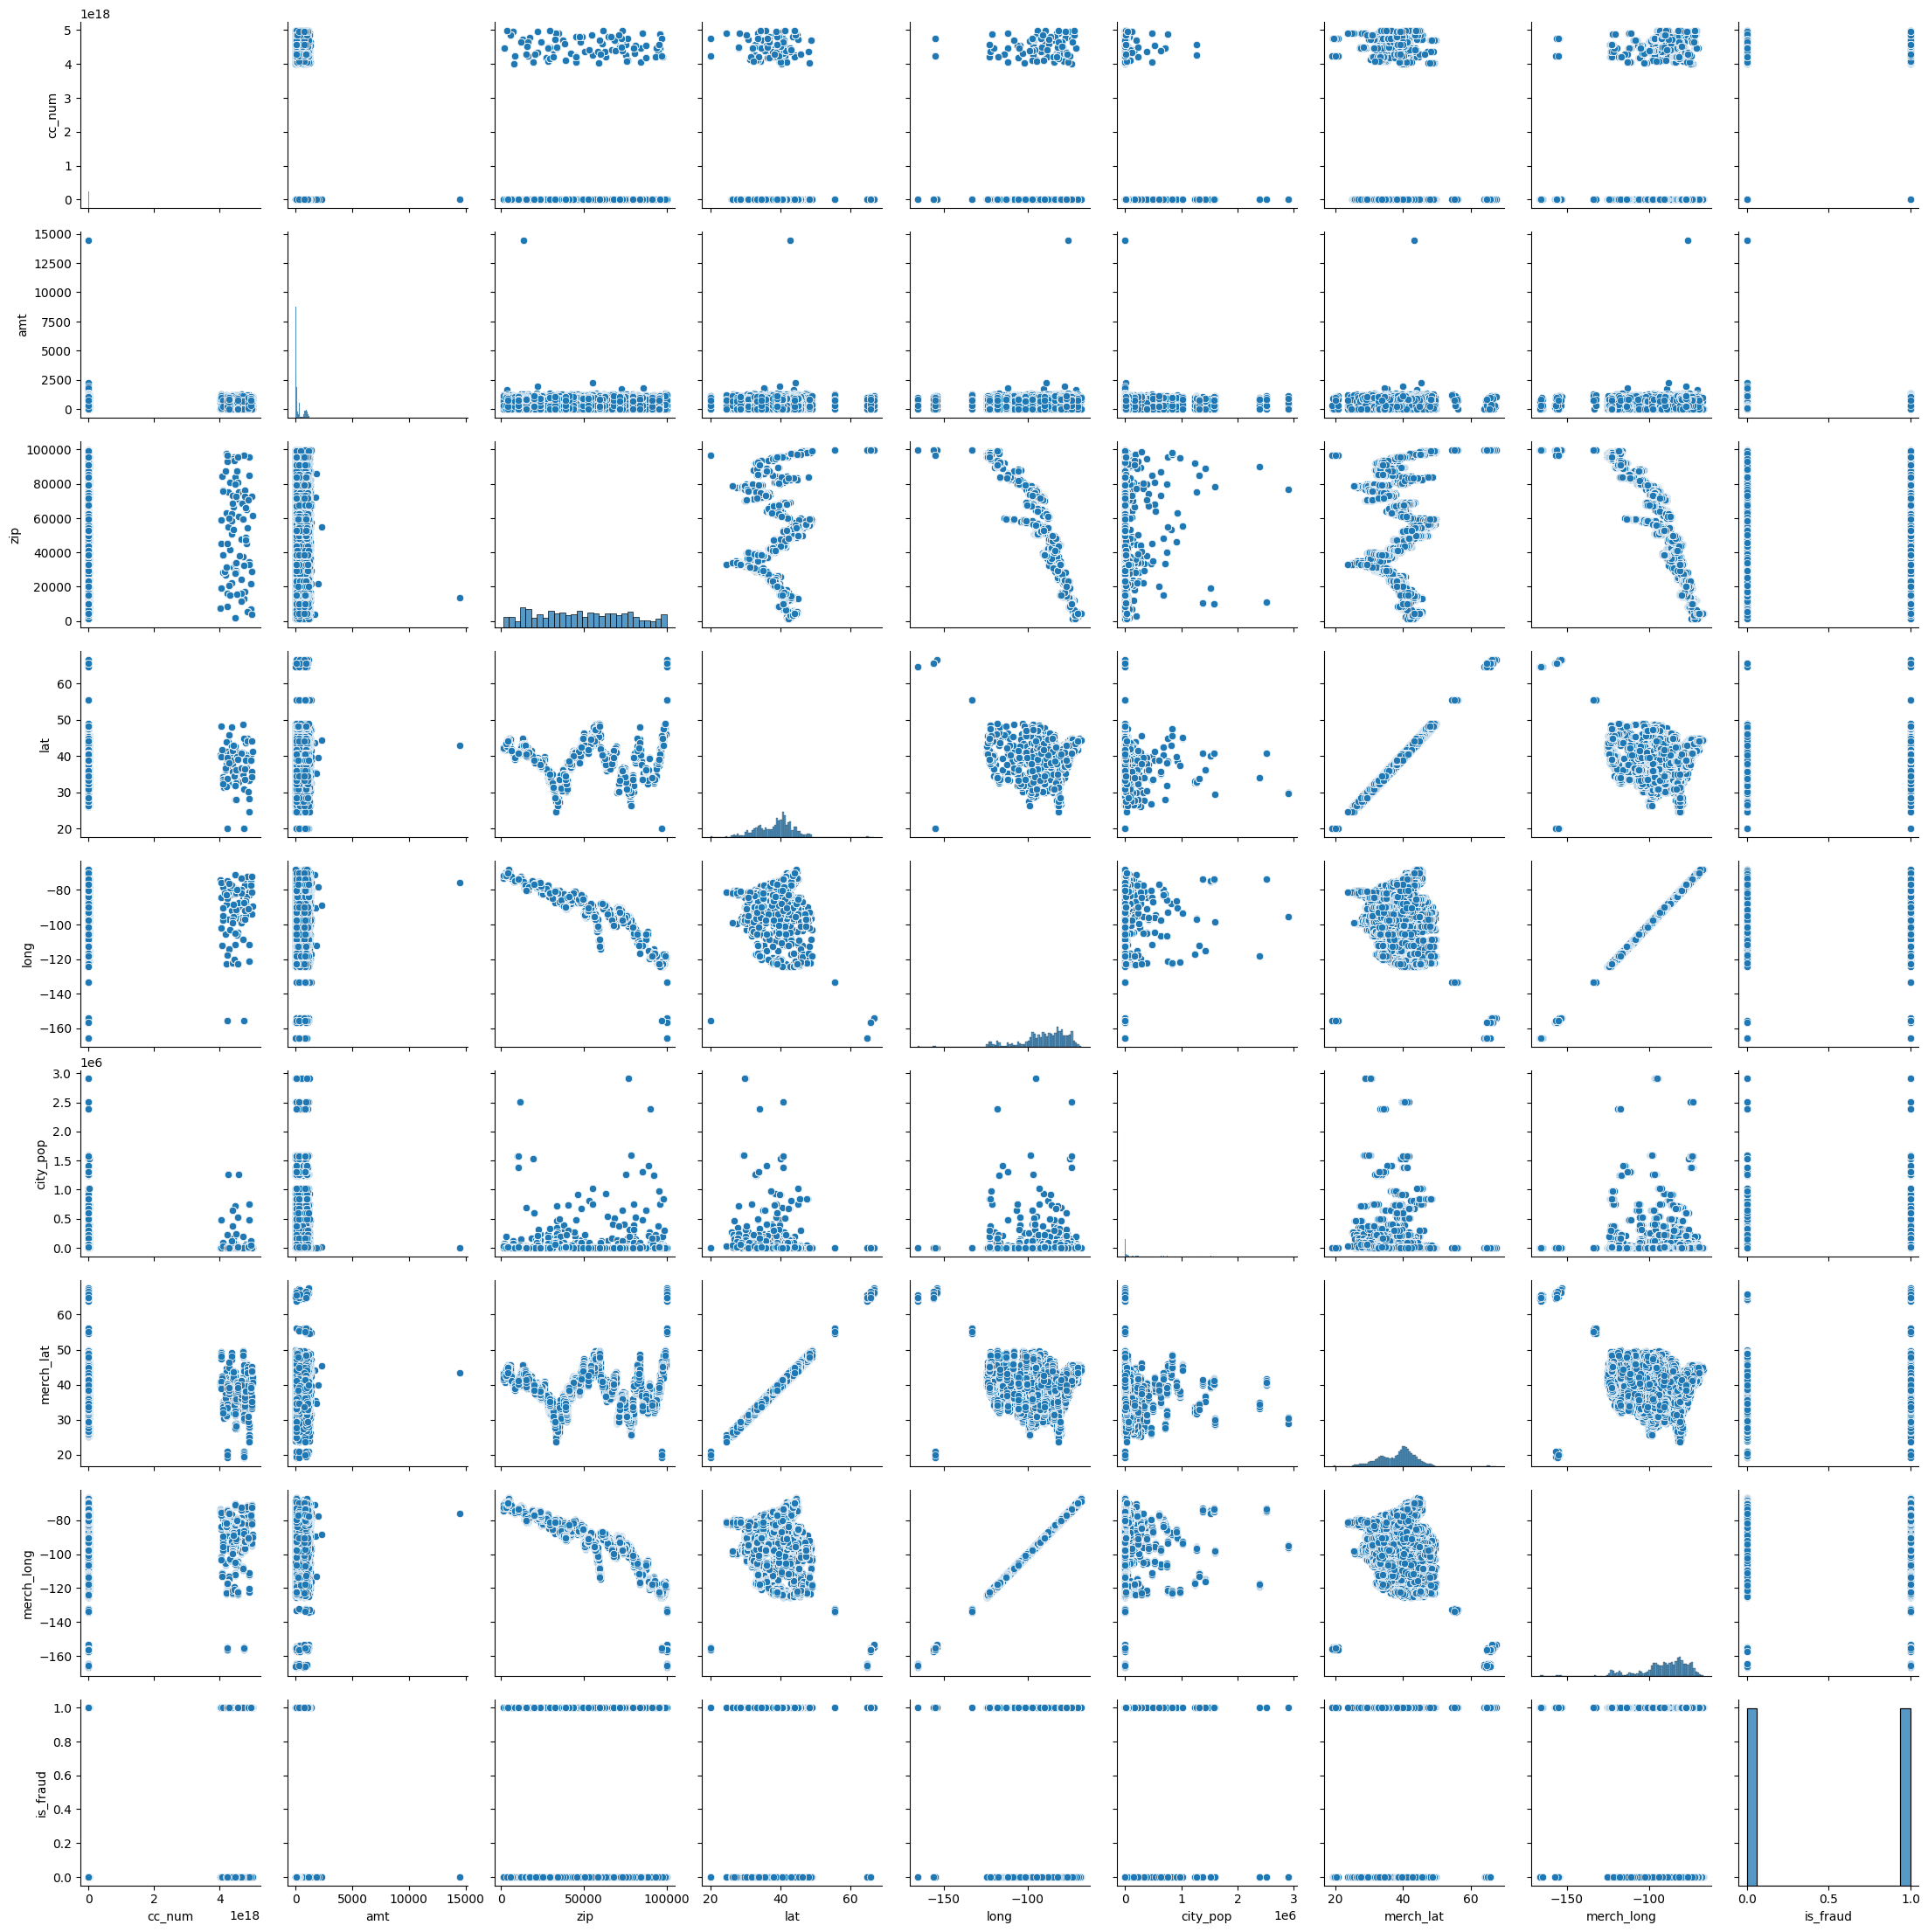

In [18]:
sns.pairplot(dataV2)

In [19]:
dataV2

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,Chatham,...,42.3496,-73.5873,4015,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,2012-03-10 03:24:30,42.974691,-73.944930,0
675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,New York City,...,40.8265,-73.9383,1577385,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,2012-10-14 15:40:47,41.046486,-74.132901,0
133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,Grant,...,34.4959,-86.2590,5901,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,2012-03-14 15:21:51,34.956184,-86.986784,0
1422423,2020-08-04 00:05:40,3542162746848552,fraud_Stamm-Witting,shopping_net,2.30,Bradley,Anderson,M,3896 Gilmore Mill,Emmons,...,43.5089,-93.4824,744,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,2013-08-04 00:05:40,43.455569,-93.662698,0
261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,Hawley,...,46.9777,-96.4092,4508,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,2012-05-10 09:04:20,46.851874,-97.269843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,2013-12-22 22:05:48,34.573471,-89.911011,1
1813949,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,2013-12-22 22:18:07,34.091227,-90.390612,1
1814016,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,2013-12-22 22:31:48,34.628434,-90.284780,1
1814204,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,2013-12-22 23:06:03,34.746063,-90.401093,1


There are two obvious things we can observe from the above data, one the lattitude and longitude of the customers are pretty close to the lattitude and longitudes of the merchants. So removing one of them doesnt matter much.

Second the transaction date and time matches that of the unix date and time. But for some reason the unix is behind in time by 9 years. So removing it is best to avoid any possible data clashes.

In [20]:
dataV2.drop(columns= ['unix_time','merch_long','merch_lat'], inplace= True)

Now lets check for data relevancy

In [21]:
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 123118 to 1814246
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  19302 non-null  datetime64[ns]
 1   cc_num                 19302 non-null  int64         
 2   merchant               19302 non-null  object        
 3   category               19302 non-null  object        
 4   amt                    19302 non-null  float64       
 5   first                  19302 non-null  object        
 6   last                   19302 non-null  object        
 7   gender                 19302 non-null  object        
 8   street                 19302 non-null  object        
 9   city                   19302 non-null  object        
 10  state                  19302 non-null  object        
 11  zip                    19302 non-null  int64         
 12  lat                    19302 non-null  float64       
 13 

Credit Card number is of no use. If we have previously figured out that someone is a fraud, their details would be on a blacklist.
Same goes for first name and last name.
Street, city, state and zip essentially contains the same details latitude and longitude contains except in human interpretable format.
Unique transaction is used to atmost add a user to the blacklist. It is not necessary for fraud detection.

In [22]:
dataV2.drop(columns= 'zip state city street first last cc_num'.split(), inplace= True)

In [23]:
dataV2

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,is_fraud
123118,2019-03-10 03:24:30,fraud_Huels-Nolan,gas_transport,67.66,F,42.3496,-73.5873,4015,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,0
675160,2019-10-14 15:40:47,fraud_Yost-Rogahn,personal_care,47.79,F,40.8265,-73.9383,1577385,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,0
133167,2019-03-14 15:21:51,fraud_Roob-Okuneva,health_fitness,24.17,M,34.4959,-86.2590,5901,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,0
1422423,2020-08-04 00:05:40,fraud_Stamm-Witting,shopping_net,2.30,M,43.5089,-93.4824,744,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,0
261154,2019-05-10 09:04:20,fraud_Howe Ltd,misc_pos,51.69,F,46.9777,-96.4092,4508,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1
1813949,2020-12-22 22:18:07,fraud_Kuhn LLC,shopping_pos,868.09,M,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1
1814016,2020-12-22 22:31:48,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1
1814204,2020-12-22 23:06:03,fraud_Bauch-Raynor,grocery_pos,289.27,M,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1


### Feature Extraction

In [24]:
dataV2['timestamp'] = dataV2['trans_date_trans_time']

In [25]:
dataV2['gender'] = dataV2['gender'].apply(lambda x : 0 if x == "M" else 1)

In [26]:
def age(x):

    year = x.split('-')[0]
    return 2024 - int(year)

In [27]:
dataV2['age'] = dataV2['dob'].apply(age)

In [28]:
dataV2.drop(columns = 'trans_date_trans_time dob'.split(), inplace= True)

In [29]:
def rename(x):

    return x.split('_')[1]

In [30]:
dataV2['merchant'] = dataV2['merchant'].apply(rename)

In [31]:
dataV2

,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,is_fraud,timestamp,age
123118,Huels-Nolan,gas_transport,67.66,1,42.3496,-73.5873,4015,Human resources officer,6744f95a0c456529c4a35cb30a5cb396,0,2019-03-10 03:24:30,53
675160,Yost-Rogahn,personal_care,47.79,1,40.8265,-73.9383,1577385,Herbalist,7c53e2c5bb6aa689753574d9f8ae623f,0,2019-10-14 15:40:47,43
133167,Roob-Okuneva,health_fitness,24.17,0,34.4959,-86.2590,5901,Curator,0b3a94c9a2f622d2f3c3399a6cc3910b,0,2019-03-14 15:21:51,52
1422423,Stamm-Witting,shopping_net,2.30,0,43.5089,-93.4824,744,Communications engineer,f365432529de779881bd7a3292fcc38a,0,2020-08-04 00:05:40,56
261154,Howe Ltd,misc_pos,51.69,1,46.9777,-96.4092,4508,Naval architect,35caf2d1468a377e45235274b005aa02,0,2019-05-10 09:04:20,75
...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,"Willms, Kris and Bergnaum",shopping_pos,1041.51,0,34.6323,-89.8855,14462,Database administrator,35b0297dd026d2e9a75d024a5dec7955,1,2020-12-22 22:05:48,65
1813949,Kuhn LLC,shopping_pos,868.09,0,34.6323,-89.8855,14462,Database administrator,da7f67d7375f10a054a3d919448c45dd,1,2020-12-22 22:18:07,65
1814016,"Mosciski, Ziemann and Farrell",shopping_net,1039.42,0,34.6323,-89.8855,14462,Database administrator,25b076c7bcd70f272c1c5326bb234f4b,1,2020-12-22 22:31:48,65
1814204,Bauch-Raynor,grocery_pos,289.27,0,34.6323,-89.8855,14462,Database administrator,2df7d894868fbc99ec1d8b055585fc9d,1,2020-12-22 23:06:03,65


Now before we perform feature extraction we need to do some EDA and analyse the data before applying further feature extractions.

### EDA (Exploratory Data Analysis)

<Axes: >

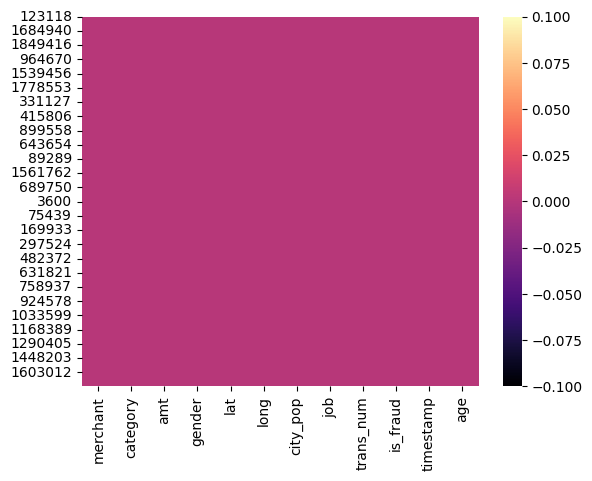

In [32]:
sns.heatmap(dataV2.isnull(), cmap = 'magma')

<Axes: >

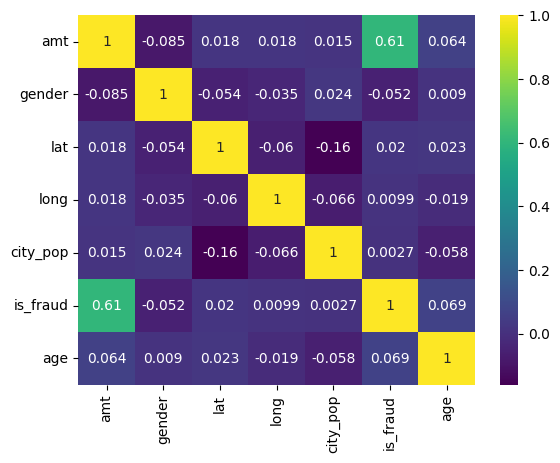

In [33]:
sns.heatmap(dataV2.corr(numeric_only=True), cmap= 'viridis', annot = True)

We can see a decently high correlation between the amount transferred and if the user was a fraud or not. So it opens up new possibilities for us to use linear correlation as a factor for models such as logistic regression.

### Feature Extaction

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [35]:
dataV2['merchant'] = label_encoder.fit_transform(dataV2['merchant'])
dataV2['job'] = label_encoder.fit_transform(dataV2['job'])
dataV2['category'] = label_encoder.fit_transform(dataV2['category'])

In [36]:
dataV2['timestamp_year'] = dataV2['timestamp'].dt.year
dataV2['timestamp_month'] = dataV2['timestamp'].dt.month
dataV2['timestamp_day'] = dataV2['timestamp'].dt.day
dataV2['timestamp_hour'] = dataV2['timestamp'].dt.hour
dataV2['timestamp_min'] = dataV2['timestamp'].dt.minute
dataV2['timestamp_second'] = dataV2['timestamp'].dt.dayofweek

In [37]:
dataV2.drop(columns= ['timestamp'], inplace = True)

### Data Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [39]:
trans_num = dataV2['trans_num']
is_fraud = dataV2['is_fraud']
col = dataV2.drop(columns = ['trans_num','is_fraud']).columns

In [40]:
dataV2 = scaler.fit_transform(dataV2.drop(columns = ['trans_num','is_fraud']))
dataV2 = pd.DataFrame(dataV2, columns=col)
dataV0 = pd.DataFrame({"trans_num":trans_num,'is_fraud':is_fraud}).reset_index(drop=True)

In [41]:
dataV2 = pd.concat([dataV0, dataV2], axis=1)

In [74]:
x = dataV2.drop(columns= ['is_fraud','trans_num'])
y = dataV2['is_fraud']

In [75]:
from sklearn.model_selection import train_test_split

### Splitting data to train test and split in proportions 75:20:5 respectively
xtrain, x2, ytrain, y2 = train_test_split(x, y, train_size = 0.75)
xtest, xvalidation, ytest, yvalidation = train_test_split(x2, y2, train_size = 0.8)

### Training (ML) Models

In [44]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

models = []

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)

models.append(log_reg)

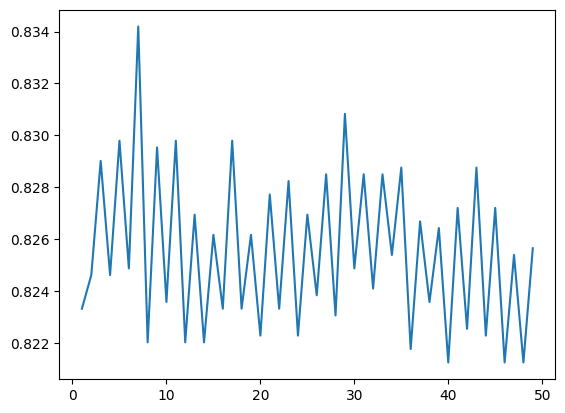

In [46]:
from sklearn.neighbors import KNeighborsClassifier

### To find the k value, we can iterate through a loop to find the best accuracy

acc = []
for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    acc.append(accuracy_score(ytest, ypred))

plt.plot(range(1,50),acc)

knn = KNeighborsClassifier(n_neighbors= acc.index(max(acc)) + 1)
knn.fit(xtrain,ytrain)
models.append(knn)

In [47]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain,ytrain)

models.append(svc)

In [48]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xtrain,ytrain)

models.append(nb)

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(xtrain,ytrain)

models.append(dtr)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

models.append(rfc)

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

models.append(xgb)

### Tesing and Evaluating ML Models

In [52]:
def foriin(x):

    mdls = ["LogisticRegression","KNNeighbors","SVC","NaiveBayes","DecisionTree","RandomForest","XGBoost"]

    for j,i in enumerate(x):

        print(mdls[j])
        ypred = i.predict(xtest)
        print('Accuracy Score : ', accuracy_score(ytest, ypred))
        print('AUC ROC Score : ', roc_auc_score(ytest, ypred))
        print('Precision : ', precision_score(ytest, ypred))
        print('Recall : ', recall_score(ytest, ypred))
        print('F1 : ', f1_score(ytest, ypred))
        print('Confusion Matrix :\n', confusion_matrix(ytest, ypred))
        print()

In [53]:
foriin(models)

LogisticRegression
Accuracy Score :  0.8559585492227979
AUC ROC Score :  0.8555833182766733
Precision :  0.9231246125232486
Recall :  0.7751171264966163
F1 :  0.842671194114318
Confusion Matrix :
 [[1815  124]
 [ 432 1489]]

KNNeighbors
Accuracy Score :  0.8341968911917098
AUC ROC Score :  0.8340797230684229
Precision :  0.8505747126436781
Recall :  0.8089536699635607
F1 :  0.8292422625400213
Confusion Matrix :
 [[1666  273]
 [ 367 1554]]

SVC
Accuracy Score :  0.8764248704663212
AUC ROC Score :  0.8762470069015433
Precision :  0.9065315315315315
Recall :  0.8381051535658511
F1 :  0.8709764674060049
Confusion Matrix :
 [[1773  166]
 [ 311 1610]]

NaiveBayes
Accuracy Score :  0.8655440414507772
AUC ROC Score :  0.8650469995991752
Precision :  0.9636243386243386
Recall :  0.7584591358667361
F1 :  0.8488202738129915
Confusion Matrix :
 [[1884   55]
 [ 464 1457]]

DecisionTree
Accuracy Score :  0.9629533678756477
AUC ROC Score :  0.962961019045489
Precision :  0.9610995850622407
Recall :  

Top 3 Models have accuracies above 95%.

In [54]:
import joblib

joblib.dump(xgb,'xgb.pkl')

['xgb.pkl']

### LSTM

In [107]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = dataV2.drop('is_fraud', axis=1)
y = dataV2['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

numerical_features = ['amt', 'lat', 'long', 'city_pop', 'age', 'timestamp_year', 'timestamp_month', 'timestamp_day', 'timestamp_hour', 'timestamp_min', 'timestamp_second', "gender", "job", "category", "merchant"]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = Sequential([
    LSTM(128, activation='relu', input_shape=(1, len(numerical_features)), return_sequences=True),
    Dropout(0.2),  # Add dropout for regularization
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.fit(X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1])),
          y_train, epochs=20, batch_size=16,
          validation_data=(X_valid.values.reshape((X_valid.shape[0], 1, X_valid.shape[1])), y_valid))

y_test_pred = (model.predict(X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))) > 0.5).astype('int')
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

### Training (DL) Models

In [55]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [76]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])


In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=100, batch_size=16, validation_data=(xvalidation, yvalidation))

Epoch 1/100
905/905 [==============================] - 1s 1ms/step - loss: 0.3782 - accuracy: 0.8366 - val_loss: 0.3208 - val_accuracy: 0.8478
Epoch 2/100
905/905 [==============================] - 1s 989us/step - loss: 0.3088 - accuracy: 0.8647 - val_loss: 0.2967 - val_accuracy: 0.8737
Epoch 3/100
905/905 [==============================] - 1s 986us/step - loss: 0.2957 - accuracy: 0.8679 - val_loss: 0.2939 - val_accuracy: 0.8592
Epoch 4/100
905/905 [==============================] - 1s 1ms/step - loss: 0.2840 - accuracy: 0.8740 - val_loss: 0.2790 - val_accuracy: 0.8810
Epoch 5/100
905/905 [==============================] - 1s 985us/step - loss: 0.2697 - accuracy: 0.8833 - val_loss: 0.2697 - val_accuracy: 0.8830
Epoch 6/100
905/905 [==============================] - 1s 986us/step - loss: 0.2534 - accuracy: 0.8942 - val_loss: 0.2803 - val_accuracy: 0.8841
Epoch 7/100
905/905 [==============================] - 1s 995us/step - loss: 0.2366 - accuracy: 0.9041 - val_loss: 0.2495 - val_accura

In [78]:
ypred = (model.predict(xtest) > 0.5).astype('int')
accuracy = accuracy_score(ytest, ypred)
print("Test Accuracy:", accuracy)

121/121 [==============================] - 0s 826us/step
Test Accuracy: 0.9282383419689119


Now lets try the same with a bit more security

### Data Perturbation

Data Perturbation is an subprocess of Data Anonymization in which random noise is added to the data sample so that the data is not comprehensible to human intelligence

In [79]:
dataV2

,trans_num,is_fraud,merchant,category,amt,gender,lat,long,city_pop,job,age,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_min,timestamp_second
0,6744f95a0c456529c4a35cb30a5cb396,0,-0.350738,-1.239491,-0.607081,0.934577,0.722660,1.189626,-0.280010,-0.116637,0.047999,-0.957686,-1.091945,-0.666052,-1.234995,-0.316965,1.384563
1,7c53e2c5bb6aa689753574d9f8ae623f,0,1.738729,0.834152,-0.659114,0.934577,0.425865,1.164448,4.894071,-0.200902,-0.505218,-0.957686,0.921031,-0.210939,0.193085,0.608393,-1.428183
2,0b3a94c9a2f622d2f3c3399a6cc3910b,0,0.965982,-0.461875,-0.720968,-1.070002,-0.807733,0.280639,-0.273808,-0.966309,-0.007323,-0.957686,-1.091945,-0.210939,0.193085,-0.490470,-0.021810
3,f365432529de779881bd7a3292fcc38a,0,1.276098,1.093358,-0.778239,-1.070002,0.948565,-0.237522,-0.290767,-1.092707,0.213964,1.044183,0.345895,-1.348720,-1.592015,-1.415827,-0.959392
4,35caf2d1468a377e45235274b005aa02,0,-0.391409,0.574947,-0.648901,0.934577,1.624505,-0.447472,-0.278389,0.402998,1.265075,-0.957686,-0.516809,-0.666052,-0.520955,-1.473662,0.446981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,35b0297dd026d2e9a75d024a5dec7955,1,1.667555,1.352563,1.943134,-1.070002,-0.781154,0.020496,-0.245655,-0.931199,0.711859,1.044183,1.496167,0.699286,1.026132,-1.415827,-0.959392
19298,da7f67d7375f10a054a3d919448c45dd,1,0.035635,1.352563,1.489000,-1.070002,-0.781154,0.020496,-0.245655,-0.931199,0.711859,1.044183,1.496167,0.699286,1.026132,-0.663974,-0.959392
19299,25b076c7bcd70f272c1c5326bb234f4b,1,0.513518,1.093358,1.937661,-1.070002,-0.781154,0.020496,-0.245655,-0.931199,0.711859,1.044183,1.496167,0.699286,1.026132,0.087879,-0.959392
19300,2df7d894868fbc99ec1d8b055585fc9d,1,-1.591200,-0.721080,-0.026752,-1.070002,-0.781154,0.020496,-0.245655,-0.931199,0.711859,1.044183,1.496167,0.699286,1.145139,-1.357992,-0.959392


In [80]:
randData = np.random.normal(loc=0, scale=100, size=dataV2.iloc[:,2:].shape[1])
dataV2.iloc[:,2:] += randData

In [81]:
dataV2

,trans_num,is_fraud,merchant,category,amt,gender,lat,long,city_pop,job,age,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_min,timestamp_second
0,6744f95a0c456529c4a35cb30a5cb396,0,-81.468600,-58.607915,61.584343,-11.550697,117.560526,-23.370128,-62.433443,-51.565492,-43.851383,-187.994004,23.615312,65.746370,-64.258256,25.131512,-113.299665
1,7c53e2c5bb6aa689753574d9f8ae623f,0,-79.379133,-56.534271,61.532310,-11.550697,117.263731,-23.395307,-57.259362,-51.649757,-44.404600,-187.994004,25.628288,66.201482,-62.830175,26.056870,-116.112410
2,0b3a94c9a2f622d2f3c3399a6cc3910b,0,-80.151880,-57.830298,61.470456,-13.555277,116.030133,-24.279116,-62.427241,-52.415165,-43.906705,-187.994004,23.615312,66.201482,-62.830175,24.958007,-114.706037
3,f365432529de779881bd7a3292fcc38a,0,-79.841765,-56.275066,61.413186,-13.555277,117.786431,-24.797276,-62.444200,-52.541562,-43.685418,-185.992134,25.053152,65.063701,-64.615276,24.032650,-115.643619
4,35caf2d1468a377e45235274b005aa02,0,-81.509271,-56.793476,61.542523,-11.550697,118.462371,-25.007227,-62.431822,-51.045857,-42.634306,-187.994004,24.190448,65.746370,-63.544216,23.974815,-114.237246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,35b0297dd026d2e9a75d024a5dec7955,1,-79.450307,-56.015860,64.134558,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,24.032650,-115.643619
19298,da7f67d7375f10a054a3d919448c45dd,1,-81.082227,-56.015860,63.680424,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,24.784503,-115.643619
19299,25b076c7bcd70f272c1c5326bb234f4b,1,-80.604344,-56.275066,64.129085,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,25.536356,-115.643619
19300,2df7d894868fbc99ec1d8b055585fc9d,1,-82.709062,-58.089504,62.164672,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.878122,24.090485,-115.643619


Now lets try the same again with the secure data

In [82]:
x = dataV2.drop(columns= ['is_fraud','trans_num'])
y = dataV2['is_fraud']

In [83]:
from sklearn.model_selection import train_test_split

### Splitting data to train test and split in proportions 75:20:5 respectively
xtrain, x2, ytrain, y2 = train_test_split(x, y, train_size = 0.75)
xtest, xvalidation, ytest, yvalidation = train_test_split(x2, y2, train_size = 0.8)

### Training (ML) Models

In [84]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

models = []

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)

models.append(log_reg)

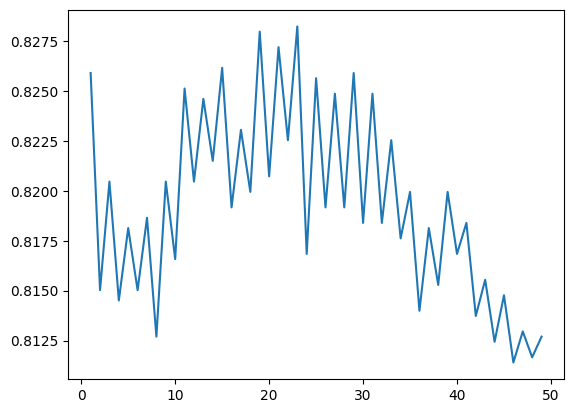

In [86]:
from sklearn.neighbors import KNeighborsClassifier

### To find the k value, we can iterate through a loop to find the best accuracy

acc = []
for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    acc.append(accuracy_score(ytest, ypred))

plt.plot(range(1,50),acc)

knn = KNeighborsClassifier(n_neighbors= acc.index(max(acc)) + 1)
knn.fit(xtrain,ytrain)
models.append(knn)

In [87]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain,ytrain)

models.append(svc)

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xtrain,ytrain)

models.append(nb)

In [89]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(xtrain,ytrain)

models.append(dtr)

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

models.append(rfc)

In [91]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

models.append(xgb)

### Tesing and Evaluating ML Models

In [92]:
def foriin(x):

    mdls = ["LogisticRegression","KNNeighbors","SVC","NaiveBayes","DecisionTree","RandomForest","XGBoost"]

    for j,i in enumerate(x):

        print(mdls[j])
        ypred = i.predict(xtest)
        print('Accuracy Score : ', accuracy_score(ytest, ypred))
        print('AUC ROC Score : ', roc_auc_score(ytest, ypred))
        print('Precision : ', precision_score(ytest, ypred))
        print('Recall : ', recall_score(ytest, ypred))
        print('F1 : ', f1_score(ytest, ypred))
        print('Confusion Matrix :\n', confusion_matrix(ytest, ypred))
        print()

In [93]:
foriin(models)

LogisticRegression
Accuracy Score :  0.8106217616580311
AUC ROC Score :  0.81179614168839
Precision :  0.8752293577981651
Recall :  0.7308478038815117
F1 :  0.7965488449763429
Confusion Matrix :
 [[1698  204]
 [ 527 1431]]

KNNeighbors
Accuracy Score :  0.8282383419689119
AUC ROC Score :  0.8294013935119099
Precision :  0.8950579621720561
Recall :  0.7492339121552605
F1 :  0.8156797331109257
Confusion Matrix :
 [[1730  172]
 [ 491 1467]]

SVC
Accuracy Score :  0.49248704663212434
AUC ROC Score :  0.4997371188222923
Precision :  0.0
Recall :  0.0
F1 :  0.0
Confusion Matrix :
 [[1901    1]
 [1958    0]]

NaiveBayes
Accuracy Score :  0.7979274611398963
AUC ROC Score :  0.8005088992931476
Precision :  0.9674603174603175
Recall :  0.6225740551583249
F1 :  0.7576134244872592
Confusion Matrix :
 [[1861   41]
 [ 739 1219]]

DecisionTree
Accuracy Score :  0.9626943005181348
AUC ROC Score :  0.9626187798661482
Precision :  0.9590080971659919
Recall :  0.9678243105209398
F1 :  0.9633960345704118


In [94]:
import joblib

joblib.dump(xgb,'xgbAnon.pkl')

['xgbAnon.pkl']

In [95]:
dataV2

,trans_num,is_fraud,merchant,category,amt,gender,lat,long,city_pop,job,age,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_min,timestamp_second
0,6744f95a0c456529c4a35cb30a5cb396,0,-81.468600,-58.607915,61.584343,-11.550697,117.560526,-23.370128,-62.433443,-51.565492,-43.851383,-187.994004,23.615312,65.746370,-64.258256,25.131512,-113.299665
1,7c53e2c5bb6aa689753574d9f8ae623f,0,-79.379133,-56.534271,61.532310,-11.550697,117.263731,-23.395307,-57.259362,-51.649757,-44.404600,-187.994004,25.628288,66.201482,-62.830175,26.056870,-116.112410
2,0b3a94c9a2f622d2f3c3399a6cc3910b,0,-80.151880,-57.830298,61.470456,-13.555277,116.030133,-24.279116,-62.427241,-52.415165,-43.906705,-187.994004,23.615312,66.201482,-62.830175,24.958007,-114.706037
3,f365432529de779881bd7a3292fcc38a,0,-79.841765,-56.275066,61.413186,-13.555277,117.786431,-24.797276,-62.444200,-52.541562,-43.685418,-185.992134,25.053152,65.063701,-64.615276,24.032650,-115.643619
4,35caf2d1468a377e45235274b005aa02,0,-81.509271,-56.793476,61.542523,-11.550697,118.462371,-25.007227,-62.431822,-51.045857,-42.634306,-187.994004,24.190448,65.746370,-63.544216,23.974815,-114.237246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,35b0297dd026d2e9a75d024a5dec7955,1,-79.450307,-56.015860,64.134558,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,24.032650,-115.643619
19298,da7f67d7375f10a054a3d919448c45dd,1,-81.082227,-56.015860,63.680424,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,24.784503,-115.643619
19299,25b076c7bcd70f272c1c5326bb234f4b,1,-80.604344,-56.275066,64.129085,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.997129,25.536356,-115.643619
19300,2df7d894868fbc99ec1d8b055585fc9d,1,-82.709062,-58.089504,62.164672,-13.555277,116.056712,-24.539258,-62.399088,-52.380054,-43.187523,-185.992134,26.203424,67.111707,-61.878122,24.090485,-115.643619


In [96]:
dataV2.to_csv('fraudDataAnon.csv')